In [5]:
#Applying Cross-Validation to Random Forest Classifier
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [7]:
# Load the dataset
df = pd.read_csv('adult.csv')

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = df.drop('income', axis=1)  # Assuming 'income' is the target column
y = df['income']


In [8]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [9]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean()}')
print(f'Standard deviation: {cv_scores.std()}')


Cross-validation scores: [0.86354796 0.85638243 0.85432023 0.85595823 0.85595823]
Mean accuracy: 0.8572334166586394
Standard deviation: 0.0032353194232962934


In [9]:
#Investigating Overfitting and Underfitting in Gradient Boosting Machines'
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('adult.csv')

data = data.replace(' ?', pd.NA)
data.dropna(inplace=True)

label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store results
n_estimators_list = [50, 100, 200]
learning_rate_list = [0.01, 0.1, 0.2]
train_accuracies = []
val_accuracies = []

# Loop through different parameters
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        # Initialize the model
        gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        
        # Training the model
        gb_classifier.fit(X_train, y_train)
        
        # Predicting on training and test sets
        train_preds = gb_classifier.predict(X_train)
        test_preds = gb_classifier.predict(X_test)
        
        # Calculating accuracy
        train_acc = accuracy_score(y_train, train_preds)
        val_acc = accuracy_score(y_test, test_preds)
        
        # Storing results
        train_accuracies.append((n_estimators, learning_rate, train_acc))
        val_accuracies.append((n_estimators, learning_rate, val_acc))
        
        print(f"n_estimators: {n_estimators}, learning_rate: {learning_rate}")
        print(f"Training Accuracy: {train_acc}")
        print(f"Validation Accuracy: {val_acc}\n")


n_estimators: 50, learning_rate: 0.01
Training Accuracy: 0.8013688613296674
Validation Accuracy: 0.8110284583361769

n_estimators: 50, learning_rate: 0.1
Training Accuracy: 0.8580245108075697
Validation Accuracy: 0.8662389954275574

n_estimators: 50, learning_rate: 0.2
Training Accuracy: 0.8675889906110152
Validation Accuracy: 0.8729270456561796

n_estimators: 100, learning_rate: 0.01
Training Accuracy: 0.8292140747023896
Validation Accuracy: 0.8378489046611616

n_estimators: 100, learning_rate: 0.1
Training Accuracy: 0.8651613091930153
Validation Accuracy: 0.8734047635296527

n_estimators: 100, learning_rate: 0.2
Training Accuracy: 0.8735265728743163
Validation Accuracy: 0.8771582611069405

n_estimators: 200, learning_rate: 0.01
Training Accuracy: 0.8462955921495218
Validation Accuracy: 0.8525899133283287

n_estimators: 200, learning_rate: 0.1
Training Accuracy: 0.8734973237006055
Validation Accuracy: 0.8787279055483519

n_estimators: 200, learning_rate: 0.2
Training Accuracy: 0.88139

In [4]:
#Evaluating Precision, Recall, and F1-Score for Random Forests
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('adult.csv')


data = data.replace(' ?', pd.NA)
data.dropna(inplace=True)

label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the data into training and test sets
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Calculating precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.75
Recall: 0.64
F1-Score: 0.69

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.75      0.64      0.69      3420

    accuracy                           0.87     14653
   macro avg       0.82      0.79      0.80     14653
weighted avg       0.86      0.87      0.86     14653



In [14]:
#4.ROCCurveand AUCfor Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

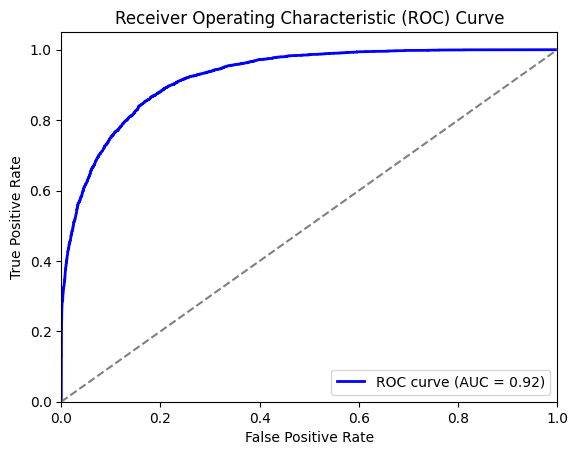

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predicting probabilities for the positive class
y_prob = gb_classifier.predict_proba(X_test)[:, 1]

# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Computing AUC
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [1]:
#5.Model Performance Comparison with Different Metrics

import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('adult.csv')

data = data.replace(' ?', pd.NA)
data.dropna(inplace=True)

label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
    
X = data.drop('income', axis=1)
y = data['income']


In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize the classifiers
classifiers = {
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}


In [3]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}


In [4]:
# Perform cross-validation and store results
results = {}
for name, clf in classifiers.items():
    scores = cross_validate(clf, X, y, cv=3, scoring=scoring, return_train_score=False)

    results[name] = scores


In [5]:
import numpy as np

# Function to print the average scores across folds
def print_scores(results):
    for name, scores in results.items():
        print(f"\n{name} Classifier Performance:")
        for metric in scoring.keys():
            mean_score = np.mean(scores[f'test_{metric}'])
            std_score = np.std(scores[f'test_{metric}'])
            print(f"{metric.capitalize()}: {mean_score:.4f} (± {std_score:.4f})")

# Printing the comparison results
print_scores(results)



SVM Classifier Performance:
Accuracy: 0.7974 (± 0.0008)
Precision: 0.9682 (± 0.0053)
Recall: 0.1584 (± 0.0037)
F1: 0.2722 (± 0.0054)
Roc_auc: 0.5784 (± 0.0018)

Random Forest Classifier Performance:
Accuracy: 0.8565 (± 0.0024)
Precision: 0.7410 (± 0.0040)
Recall: 0.6153 (± 0.0105)
F1: 0.6723 (± 0.0072)
Roc_auc: 0.7738 (± 0.0051)

Gradient Boosting Classifier Performance:
Accuracy: 0.8665 (± 0.0022)
Precision: 0.7934 (± 0.0022)
Recall: 0.5978 (± 0.0098)
F1: 0.6818 (± 0.0071)
Roc_auc: 0.7744 (± 0.0048)
